In [29]:
#Call in my packages
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from Starclass import Star
import ClosePlots as cp
import barbershop

import glob
from tqdm import tqdm
import sys
import os

Populating the interactive namespace from numpy and matplotlib


In [30]:
#Import useful data
sfile = glob.glob('../../data/Elsworth+/Elsworth_x_TGAS*')[0]
df = pd.read_csv(sfile)
print(list(df))

['0', 'KIC', 'astero_parallax', 'astero_parallax_err', 'parallax', 'parallax_error', 'duplicated_source', 'Unnamed: 0.1', 'P12', 'G', '2MASS', 'GLAT', 'GLON', 'Teffc', 'e_Teffc', 'Teff', 'e_Teff', 'Dnu', 'e_Dnu', 'numax', 'e_numax', 'Notes', 'Teff1', 'e_Teff1', '[M/H]1', 'e_[M/H]1', 'M1', 'E_M1', 'e_M1', 'R1', 'E_R1', 'e_R1', 'log.g1', 'E_log.g1', 'e_log.g1', 'rho1', 'E_rho1', 'e_rho1', 'Teff2', 'e_Teff2', '[M/H]2', 'e_[M/H]2', 'M2', 'E_M2', 'e_M2', 'R2', 'E_R2', 'e_R2', 'log.g2', 'E_log.g2', 'e_log.g2', 'rho2', 'E_rho2', 'e_rho2', '_RA', '_DE', 'Unnamed: 0.1.1', 'kic_ra', 'kic_dec', 'kic_pmra', 'kic_pmdec', 'kic_umag', 'kic_gmag', 'kic_rmag', 'kic_imag', 'kic_zmag', 'kic_gredmag', 'kic_d51mag', 'kic_jmag', 'kic_hmag', 'kic_kmag', 'kic_kepmag', 'kic_kepler_id', 'kic_tmid', 'kic_scpid', 'kic_altid', 'kic_altsource', 'kic_galaxy', 'kic_blend', 'kic_variable', 'kic_teff', 'kic_logg', 'kic_feh', 'kic_ebminusv', 'kic_av', 'kic_radius', 'kic_cq', 'kic_pq', 'kic_aq', 'kic_catkey', 'kic_scpkey

In [31]:
#Kill data where parallax error > 30% of the parallax value
print(len(df))
df = df[df.astero_parallax_err <= .3*df.astero_parallax].reset_index()
print(len(df))
#Kill weird mass outliers
df = df[df.M1 > 0.]
len(df)
#Fix IDs for Elsworth
df.stage[df.stage=='RGB']=0
df.stage[df.stage=='RC']=1
df.stage[df.stage=='2CL']=2
df.stage[df.stage=='U'] = 3
df.stage = df.stage.fillna(3)
#Reindex
df = df.reindex()

886
886


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [32]:
S = Star(str(df.KIC)) #Call class
S.pass_parallax(df.astero_parallax, err=df.astero_parallax_err)
S.pass_position(df.GLON, df.GLAT, frame='galactic')
S.pass_magnitude(df.kic_kmag,err=None, band='Ks')
AKs = S.get_A()
M, M_err = S.get_M()

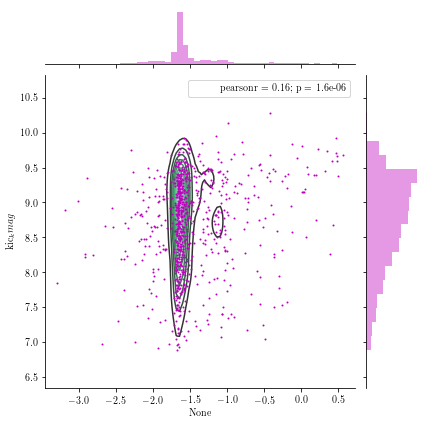

In [33]:
#Build a distplot
g=sns.jointplot(M, df.kic_kmag,color="m",s=1)
g.plot_joint(sns.kdeplot, zorder=0, nlevels=10)

Text(0,0.5,u'm$_{Ks}$')

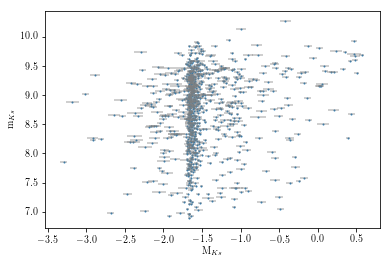

In [34]:
#Plot a m - M plot with errorbars
fig, ax = plt.subplots()
ax.scatter(M, df.kic_kmag,s=1)
ax.errorbar(M, df.kic_kmag, xerr=M_err,alpha=.5,fmt=None,c='grey')
ax.set_xlabel(r'M$_{Ks}$')
ax.set_ylabel(r'm$_{Ks}$')

Text(0,0.5,u'$m_{Ks}$')

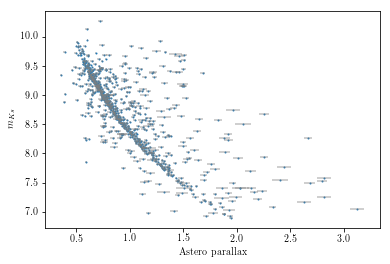

In [35]:
#Plot the Davies+17 Ks - parallax plot
fig, ax = plt.subplots()
ax.scatter(df.astero_parallax, df.kic_kmag, s=1)
ax.errorbar(df.astero_parallax,df.kic_kmag, xerr=df.astero_parallax_err, alpha=.5, fmt=None, c='grey')
ax.set_xlabel('Astero parallax')
ax.set_ylabel(r'$m_{Ks}$')

Text(0,0.5,u'Absolute Mag in Ks')

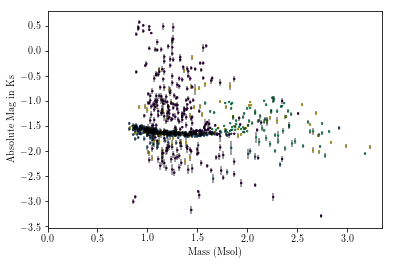

In [36]:
#Plot the absolute magnitude against mass
fig, ax = plt.subplots()
ax.scatter(df.M1,M,c=df.stage,s=2)
ax.errorbar(df.M1, M, yerr=M_err, alpha=.5, fmt='None', c='grey')
ax.set_xlim(0)
ax.set_xlabel('Mass (Msol)')
ax.set_ylabel('Absolute Mag in Ks')

Number of seats in use : 1/5.


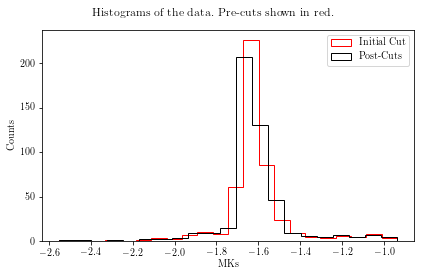

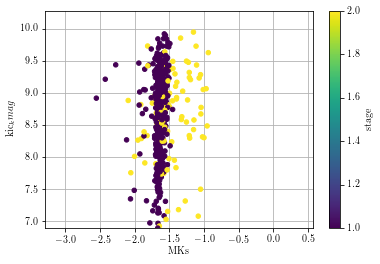

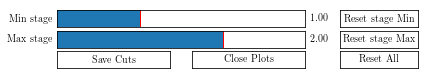

In [37]:
df['MKs'] = M
df['MKs_err'] = M_err
barber = barbershop.open(df,'MKs','kic_kmag')
barber.add_client('stage',lower=1.,upper=2.)
barber.histograms_on(x=True)
barber.show_mirror()


In [38]:
#Kill the code. Code graveyard below
df.to_csv('~/PhD/Catalogues/hawkinstester.csv')
sys.exit()



SystemExit: 

In [ ]:
#Perfect match
#Lets compare these two first before doing the distplot
fig, (ax, axr) = plt.subplots(2)
ax.scatter(M_gal, M_icrs, s=3, zorder=1000)
ax.errorbar(M_gal, M_icrs, xerr = M_gal_err, c='grey',yerr = M_icrs_err, alpha=.3, fmt='o', zorder=999)
ax.plot(M_gal, M_gal, c='r', alpha=.7, linestyle='--',zorder=1001)
ax.set_ylabel('M (icrs coords)')
ax.set_xlabel('M (galactic coords)')

axr.scatter(M_gal, M_gal - M_icrs, s=3, zorder=1000)
axr.errorbar(M_gal, M_gal - M_icrs, c='grey', alpha=.3, fmt='o',
            yerr = np.sqrt(M_gal_err**2 + M_icrs_err**2), zorder=999)
axr.set_ylabel('M (galactic) - M (icrs)')
axr.set_xlabel('M (galactic)')
axr.axhline(0., c='r', linestyle='--', alpha=.7)

axr.grid()
ax.grid()
fig.tight_layout()